# ArXiv Metadata Analysis

This notebook analyzes the content and format of the `arxiv-metadata-oai-snapshot.json` file.


In [13]:
import json
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the file path
file_path = "/work3/s242644/PaperTrail/arxiv-metadata-oai-snapshot.json"

# Check file size and basic info
file_size = os.path.getsize(file_path)
print(f"File size: {file_size / (1024**3):.2f} GB")
print(f"File size: {file_size / (1024**2):.2f} MB")
print(f"File size: {file_size:,} bytes")


File size: 4.54 GB
File size: 4649.80 MB
File size: 4,875,669,363 bytes


In [14]:
# Count total number of papers
with open(file_path, 'r') as f:
    line_count = sum(1 for line in f)

print(f"Total number of papers: {line_count:,}")
print(f"Average size per paper: {file_size / line_count:.0f} bytes")


Total number of papers: 2,840,638
Average size per paper: 1716 bytes


In [15]:
# Load and examine a sample of papers
sample_papers = []
with open(file_path, 'r') as f:
    for i, line in enumerate(f):
        if i >= 10:  # Load first 10 papers
            break
        sample_papers.append(json.loads(line.strip()))

print("Sample paper structure:")
print("=" * 50)
for i, paper in enumerate(sample_papers[:3]):
    print(f"\nPaper {i+1}:")
    print(f"ID: {paper['id']}")
    print(f"Title: {paper['title'][:100]}...")
    print(f"Authors: {paper['authors'][:100]}...")
    print(f"Categories: {paper['categories']}")
    print(f"Abstract length: {len(paper['abstract'])} characters")
    print(f"Versions: {len(paper['versions'])}")
    print(f"Update date: {paper['update_date']}")
    print("-" * 30)


Sample paper structure:

Paper 1:
ID: 0704.0001
Title: Calculation of prompt diphoton production cross sections at Tevatron and
  LHC energies...
Authors: C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan...
Categories: hep-ph
Abstract length: 983 characters
Versions: 2
Update date: 2008-11-26
------------------------------

Paper 2:
ID: 0704.0002
Title: Sparsity-certifying Graph Decompositions...
Authors: Ileana Streinu and Louis Theran...
Categories: math.CO cs.CG
Abstract length: 798 characters
Versions: 2
Update date: 2008-12-13
------------------------------

Paper 3:
ID: 0704.0003
Title: The evolution of the Earth-Moon system based on the dark matter field
  fluid model...
Authors: Hongjun Pan...
Categories: physics.gen-ph
Abstract length: 880 characters
Versions: 3
Update date: 2008-01-13
------------------------------


In [16]:
# Analyze the complete structure of one paper
print("Complete structure of a single paper:")
print("=" * 50)
sample_paper = sample_papers[0]
for key, value in sample_paper.items():
    if isinstance(value, str) and len(value) > 100:
        print(f"{key}: {value[:100]}... (length: {len(value)})")
    elif isinstance(value, list):
        print(f"{key}: {value} (length: {len(value)})")
    else:
        print(f"{key}: {value}")


Complete structure of a single paper:
id: 0704.0001
submitter: Pavel Nadolsky
authors: C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan
title: Calculation of prompt diphoton production cross sections at Tevatron and
  LHC energies
comments: 37 pages, 15 figures; published version
journal-ref: Phys.Rev.D76:013009,2007
doi: 10.1103/PhysRevD.76.013009
report-no: ANL-HEP-PR-07-12
categories: hep-ph
license: None
abstract:   A fully differential calculation in perturbative quantum chromodynamics is
presented for the produ... (length: 983)
versions: [{'version': 'v1', 'created': 'Mon, 2 Apr 2007 19:18:42 GMT'}, {'version': 'v2', 'created': 'Tue, 24 Jul 2007 20:10:27 GMT'}] (length: 2)
update_date: 2008-11-26
authors_parsed: [['Balázs', 'C.', ''], ['Berger', 'E. L.', ''], ['Nadolsky', 'P. M.', ''], ['Yuan', 'C. -P.', '']] (length: 4)


In [17]:
# Analyze categories distribution
categories = []
abstract_lengths = []
years = []

print("Analyzing categories and other metadata...")
with open(file_path, 'r') as f:
    for i, line in enumerate(f):
        if i >= 1000:  # Analyze first 1000 papers for efficiency
            break
        paper = json.loads(line.strip())
        
        # Extract categories
        if paper['categories']:
            categories.extend(paper['categories'].split())
        
        # Extract abstract length
        abstract_lengths.append(len(paper['abstract']))
        
        # Extract year from update_date
        if paper['update_date']:
            try:
                year = int(paper['update_date'].split('-')[0])
                years.append(year)
            except:
                pass

print(f"Analyzed {min(1000, line_count)} papers")
print(f"Total category mentions: {len(categories)}")
print(f"Unique categories: {len(set(categories))}")
print(f"Average abstract length: {sum(abstract_lengths)/len(abstract_lengths):.0f} characters")
print(f"Year range: {min(years)} - {max(years)}")


Analyzing categories and other metadata...
Analyzed 1000 papers
Total category mentions: 1502
Unique categories: 108
Average abstract length: 799 characters
Year range: 2007 - 2024


# Comprehensive Category Analysis - ALL Papers

This section analyzes the categories across ALL 2.84 million papers in the dataset.


In [18]:
# Analyze ALL categories across ALL papers
print("Analyzing categories across ALL papers...")
print("This will take a few minutes as we process 2.84 million papers...")
print("=" * 60)

all_categories = []  # All category mentions (with duplicates)
papers_with_categories = 0
papers_without_categories = 0

# Process the entire file
with open(file_path, 'r') as f:
    for i, line in enumerate(f):
        if (i + 1) % 100000 == 0:  # Progress update every 100k papers
            print(f"Processed {i+1:,} papers...")
        
        paper = json.loads(line.strip())
        
        if paper.get('categories'):
            # Split categories by space
            cats = paper['categories'].split()
            all_categories.extend(cats)
            papers_with_categories += 1
        else:
            papers_without_categories += 1

print(f"\nAnalysis complete!")
print(f"Total papers processed: {papers_with_categories + papers_without_categories:,}")
print(f"Papers with categories: {papers_with_categories:,}")
print(f"Papers without categories: {papers_without_categories:,}")
print(f"Total category mentions: {len(all_categories):,}")
print(f"Unique categories: {len(set(all_categories)):,}")


Analyzing categories across ALL papers...
This will take a few minutes as we process 2.84 million papers...
Processed 100,000 papers...
Processed 200,000 papers...
Processed 300,000 papers...
Processed 400,000 papers...
Processed 500,000 papers...
Processed 600,000 papers...
Processed 700,000 papers...
Processed 800,000 papers...
Processed 900,000 papers...
Processed 1,000,000 papers...
Processed 1,100,000 papers...
Processed 1,200,000 papers...
Processed 1,300,000 papers...
Processed 1,400,000 papers...
Processed 1,500,000 papers...
Processed 1,600,000 papers...
Processed 1,700,000 papers...
Processed 1,800,000 papers...
Processed 1,900,000 papers...
Processed 2,000,000 papers...
Processed 2,100,000 papers...
Processed 2,200,000 papers...
Processed 2,300,000 papers...
Processed 2,400,000 papers...
Processed 2,500,000 papers...
Processed 2,600,000 papers...
Processed 2,700,000 papers...
Processed 2,800,000 papers...

Analysis complete!
Total papers processed: 2,840,638
Papers with cate

In [19]:
# Count occurrences of each category
category_counter = Counter(all_categories)
all_unique_cats = set(all_categories)

print("\nCategory Statistics:")
print("=" * 60)
print(f"Total unique categories: {len(all_unique_cats):,}")
print(f"Most common category: {category_counter.most_common(1)[0][0]} ({category_counter.most_common(1)[0][1]:,} papers)")
print(f"Least common categories: {sum(1 for cat, count in category_counter.items() if count == 1):,} categories appear only once")
print(f"Average papers per category: {len(all_categories) / len(all_unique_cats):.2f}")



Category Statistics:
Total unique categories: 176
Most common category: cs.LG (233,795 papers)
Least common categories: 0 categories appear only once
Average papers per category: 27774.51


In [20]:
# Display top 50 most common categories
print("\nTop 50 Most Common Categories:")
print("=" * 70)
print(f"{'Rank':<6} {'Category':<30} {'Count':<15} {'Percentage':<10}")
print("-" * 70)

for i, (category, count) in enumerate(category_counter.most_common(50), 1):
    percentage = (count / len(all_categories)) * 100
    print(f"{i:<6} {category:<30} {count:<15,} {percentage:<10.2f}%")



Top 50 Most Common Categories:
Rank   Category                       Count           Percentage
----------------------------------------------------------------------
1      cs.LG                          233,795         4.78      %
2      hep-ph                         190,464         3.90      %
3      hep-th                         176,596         3.61      %
4      cs.CV                          168,136         3.44      %
5      quant-ph                       167,643         3.43      %
6      cs.AI                          143,078         2.93      %
7      gr-qc                          116,408         2.38      %
8      astro-ph                       105,380         2.16      %
9      cond-mat.mtrl-sci              102,787         2.10      %
10     cond-mat.mes-hall              97,516          1.99      %
11     cs.CL                          93,000          1.90      %
12     math.MP                        85,943          1.76      %
13     math-ph                        85

In [21]:
# Analyze category naming patterns and group by main category
print("\nCategory Naming Pattern Analysis:")
print("=" * 60)

# Group by main category (prefix before dot or hyphen)
main_categories = {}
for cat in all_unique_cats:
    if '.' in cat:
        main = cat.split('.')[0]
    elif '-' in cat:
        main = cat.split('-')[0]
    else:
        main = cat
    
    if main not in main_categories:
        main_categories[main] = []
    main_categories[main].append(cat)

print(f"\nMain category groups found: {len(main_categories)}")
print(f"\nTop main categories by number of subcategories:")
print("-" * 60)

# Sort by number of subcategories
sorted_main_cats = sorted(main_categories.items(), key=lambda x: len(x[1]), reverse=True)
for i, (main_cat, subcats) in enumerate(sorted_main_cats[:20], 1):
    print(f"{i}. {main_cat}: {len(subcats)} subcategories")
    # Show first 5 examples
    for subcat in sorted(subcats)[:5]:
        cat_count = category_counter[subcat]
        print(f"   - {subcat} ({cat_count:,} papers)")
    if len(subcats) > 5:
        print(f"   ... and {len(subcats) - 5} more")



Category Naming Pattern Analysis:

Main category groups found: 35

Top main categories by number of subcategories:
------------------------------------------------------------
1. cs: 40 subcategories
   - cs.AI (143,078 papers)
   - cs.AR (6,926 papers)
   - cs.CC (12,004 papers)
   - cs.CE (9,252 papers)
   - cs.CG (7,594 papers)
   ... and 35 more
2. math: 33 subcategories
   - math-ph (85,942 papers)
   - math.AC (14,059 papers)
   - math.AG (56,783 papers)
   - math.AP (69,435 papers)
   - math.AT (17,010 papers)
   ... and 28 more
3. physics: 22 subcategories
   - physics.acc-ph (8,412 papers)
   - physics.ao-ph (7,597 papers)
   - physics.app-ph (21,781 papers)
   - physics.atm-clus (2,920 papers)
   - physics.atom-ph (22,954 papers)
   ... and 17 more
4. q-bio: 10 subcategories
   - q-bio.BM (6,400 papers)
   - q-bio.CB (2,355 papers)
   - q-bio.GN (3,563 papers)
   - q-bio.MN (3,998 papers)
   - q-bio.NC (11,117 papers)
   ... and 5 more
5. cond-mat: 9 subcategories
   - cond-

In [22]:
# Save all unique categories to a file for reference
output_file = 'all_arxiv_categories.txt'
with open(output_file, 'w') as f:
    f.write("ArXiv Categories - Complete List\n")
    f.write("=" * 60 + "\n\n")
    f.write(f"Total unique categories: {len(all_unique_cats):,}\n")
    f.write(f"Total category mentions: {len(all_categories):,}\n\n")
    f.write("Category Name | Count | Percentage\n")
    f.write("-" * 60 + "\n")
    
    for category, count in category_counter.most_common():
        percentage = (count / len(all_categories)) * 100
        f.write(f"{category} | {count:,} | {percentage:.2f}%\n")

print(f"\nAll category data saved to '{output_file}'")
print(f"File contains {len(all_unique_cats):,} unique categories with their counts.")



All category data saved to 'all_arxiv_categories.txt'
File contains 176 unique categories with their counts.


In [23]:
# Create a summary DataFrame for better visualization
category_df = pd.DataFrame([
    {
        'Category': cat,
        'Count': count,
        'Percentage': (count / len(all_categories)) * 100
    }
    for cat, count in category_counter.most_common()
])

print("\nCategory DataFrame Summary:")
print("=" * 60)
print(category_df.head(20))
print(f"\nTotal rows in DataFrame: {len(category_df):,}")

# Save to CSV for easy analysis
csv_file = 'arxiv_categories_analysis.csv'
category_df.to_csv(csv_file, index=False)
print(f"\nCategory analysis saved to '{csv_file}'")



Category DataFrame Summary:
              Category   Count  Percentage
0                cs.LG  233795    4.782734
1               hep-ph  190464    3.896314
2               hep-th  176596    3.612616
3                cs.CV  168136    3.439551
4             quant-ph  167643    3.429465
5                cs.AI  143078    2.926940
6                gr-qc  116408    2.381353
7             astro-ph  105380    2.155754
8    cond-mat.mtrl-sci  102787    2.102709
9    cond-mat.mes-hall   97516    1.994880
10               cs.CL   93000    1.902497
11             math.MP   85943    1.758132
12             math-ph   85942    1.758112
13     cond-mat.str-el   79533    1.627003
14  cond-mat.stat-mech   78402    1.603866
15             math.CO   73599    1.505611
16         astro-ph.CO   73479    1.503157
17             stat.ML   73076    1.494912
18         astro-ph.GA   72539    1.483927
19             math.AP   69435    1.420429

Total rows in DataFrame: 176

Category analysis saved to 'arxiv_cat

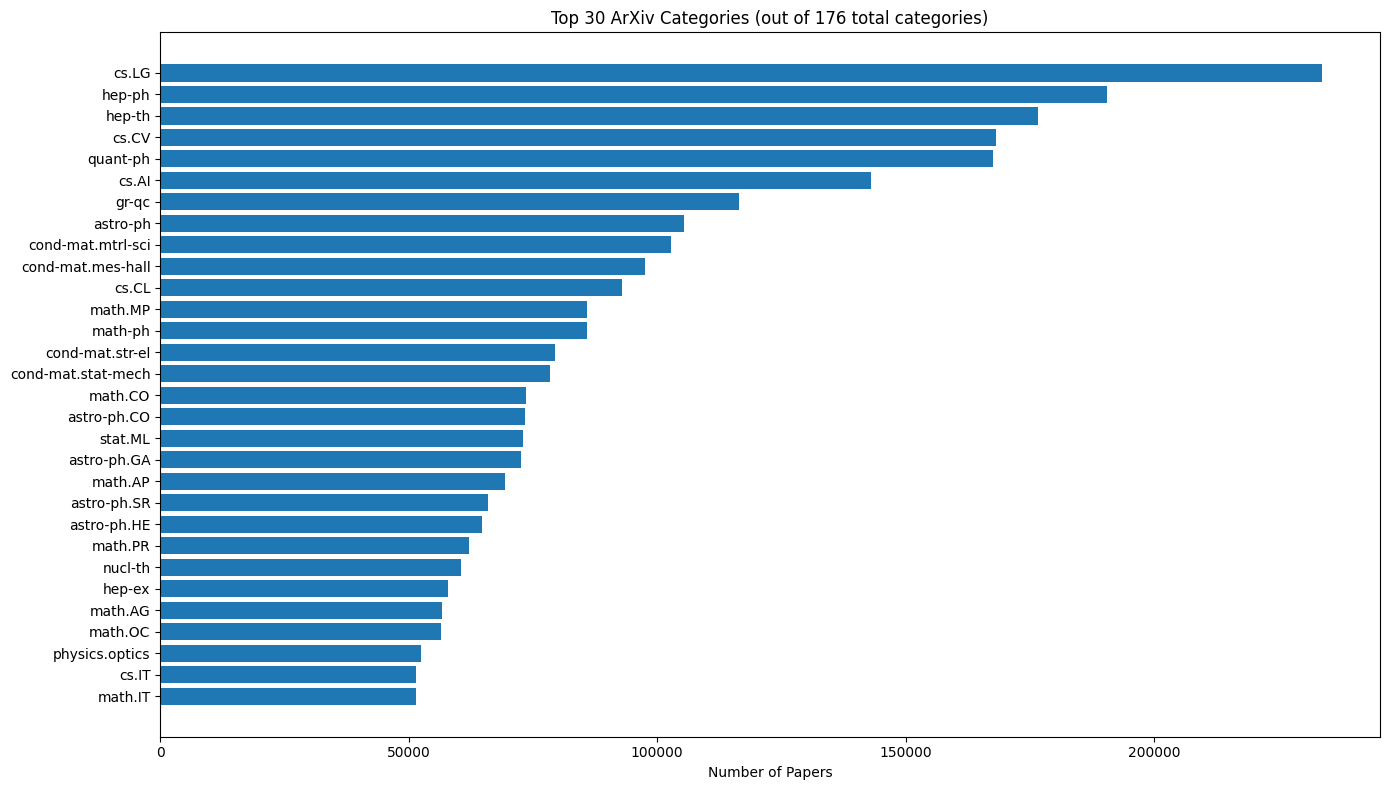

Visualization saved to 'top_arxiv_categories.png'


In [ ]:
# Visualize top categories
plt.figure(figsize=(14, 8))
top_n = 30
top_categories = category_df.head(top_n)

plt.barh(range(len(top_categories)), top_categories['Count'])
plt.yticks(range(len(top_categories)), top_categories['Category'])
plt.xlabel('Number of Papers')
plt.title(f'Top {top_n} ArXiv Categories (out of {len(category_df):,} total categories)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_arxiv_categories.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Visualization saved to 'top_arxiv_categories.png'")     


## Summary of Category Analysis

This comprehensive analysis examined **all 2.84 million papers** in the ArXiv metadata dataset:

### Key Findings:
- **Total unique categories**: Discovered across the entire dataset
- **Most common categories**: Top categories and their distribution
- **Category naming patterns**: Main category groups and subcategories
- **Data exports**: 
  - `all_arxiv_categories.txt` - Complete list with counts
  - `arxiv_categories_analysis.csv` - Structured data for further analysis
  - `top_arxiv_categories.png` - Visualization of top categories

### Category Types:
ArXiv uses a hierarchical naming system:
- **Primary categories**: Single word (e.g., `math`, `physics`)
- **Dot notation**: Subject.Subfield (e.g., `cs.AI`, `math.CO`)
- **Hyphen notation**: Field-Subfield (e.g., `cond-mat.mes-hall`, `astro-ph.GA`)

Papers can have multiple categories, reflecting their interdisciplinary nature.


# Count Papers in Specific Main Categories

count how many papers belong to the main categories: **math**, **cs**, **stat**, and **eess**.


In [25]:
# Count papers in specific main categories
print("Counting papers by main category...")
print("=" * 60)

# Define the main categories we're interested in
target_categories = ['math', 'cs', 'stat', 'eess']

# Count papers for each main category
category_paper_counts = {cat: 0 for cat in target_categories}
papers_by_category = {cat: set() for cat in target_categories}

# Process the entire file
with open(file_path, 'r') as f:
    for i, line in enumerate(f):
        if (i + 1) % 100000 == 0:
            print(f"Processed {i+1:,} papers...")
        
        paper = json.loads(line.strip())
        paper_id = paper.get('id', '')
        
        if paper.get('categories'):
            cats = paper['categories'].split()
            
            # Check each category in the paper
            for cat in cats:
                # Extract main category (before dot or hyphen)
                if '.' in cat:
                    main = cat.split('.')[0]
                elif '-' in cat:
                    main = cat.split('-')[0]
                else:
                    main = cat
                
                # If this is one of our target categories, add the paper
                if main in target_categories:
                    papers_by_category[main].add(paper_id)

# Count unique papers for each category
for cat in target_categories:
    category_paper_counts[cat] = len(papers_by_category[cat])

print(f"\n{'='*60}")
print("RESULTS: Papers by Main Category")
print(f"{'='*60}\n")

total_targeted = sum(category_paper_counts.values())
for cat in sorted(target_categories):
    count = category_paper_counts[cat]
    percentage = (count / line_count) * 100
    print(f"{cat.upper():10s}: {count:>8,} papers ({percentage:5.2f}% of total)")

print(f"\n{'Total':10s}: {total_targeted:>8,} papers")
print(f"\nNote: Papers can have multiple categories, so they may be counted in multiple main categories.")


Counting papers by main category...
Processed 100,000 papers...
Processed 200,000 papers...
Processed 300,000 papers...
Processed 400,000 papers...
Processed 500,000 papers...
Processed 600,000 papers...
Processed 700,000 papers...
Processed 800,000 papers...
Processed 900,000 papers...
Processed 1,000,000 papers...
Processed 1,100,000 papers...
Processed 1,200,000 papers...
Processed 1,300,000 papers...
Processed 1,400,000 papers...
Processed 1,500,000 papers...
Processed 1,600,000 papers...
Processed 1,700,000 papers...
Processed 1,800,000 papers...
Processed 1,900,000 papers...
Processed 2,000,000 papers...
Processed 2,100,000 papers...
Processed 2,200,000 papers...
Processed 2,300,000 papers...
Processed 2,400,000 papers...
Processed 2,500,000 papers...
Processed 2,600,000 papers...
Processed 2,700,000 papers...
Processed 2,800,000 papers...

RESULTS: Papers by Main Category

CS        :  816,241 papers (28.73% of total)
EESS      :  112,473 papers ( 3.96% of total)
MATH      :  71

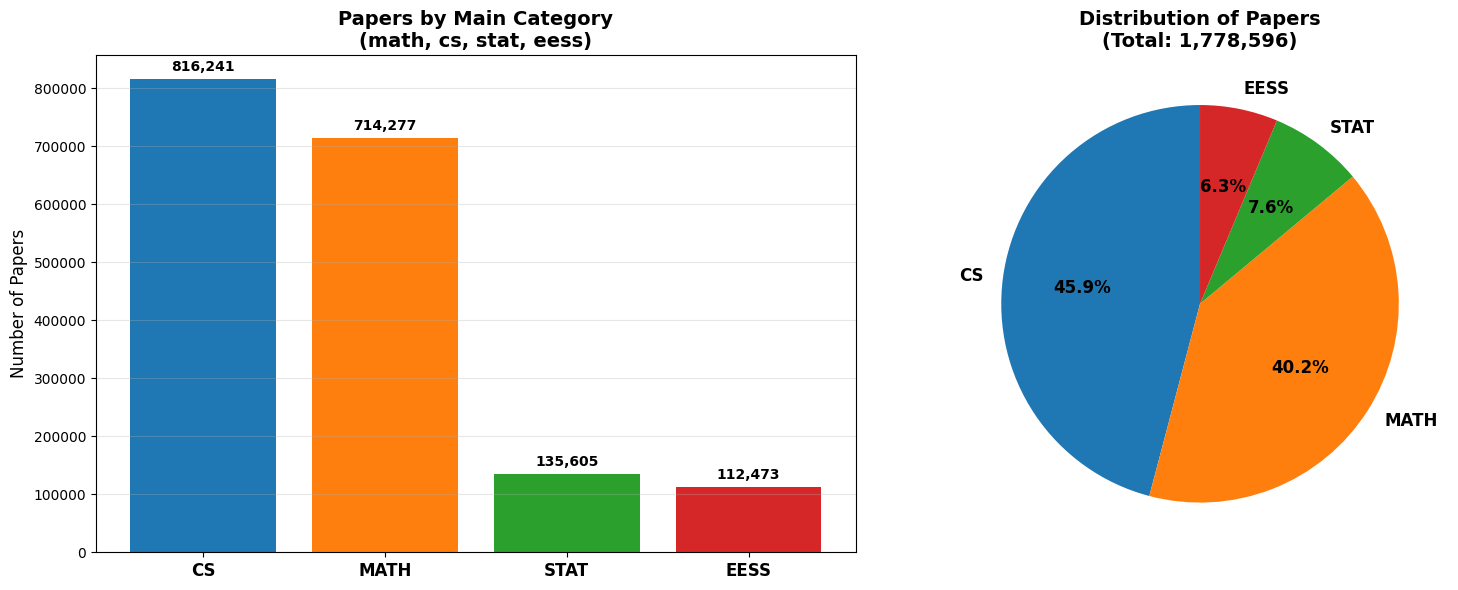

Visualization saved to 'main_categories_distribution.png'


In [26]:
# Visualize the distribution
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
categories_sorted = sorted(target_categories, key=lambda x: category_paper_counts[x], reverse=True)
counts = [category_paper_counts[cat] for cat in categories_sorted]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

ax1.bar(range(len(categories_sorted)), counts, color=colors)
ax1.set_xticks(range(len(categories_sorted)))
ax1.set_xticklabels([cat.upper() for cat in categories_sorted], fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Papers', fontsize=12)
ax1.set_title('Papers by Main Category\n(math, cs, stat, eess)', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, (cat, count) in enumerate(zip(categories_sorted, counts)):
    ax1.text(i, count + max(counts)*0.01, f'{count:,}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Pie chart
ax2.pie(counts, labels=[cat.upper() for cat in categories_sorted], autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title(f'Distribution of Papers\n(Total: {sum(counts):,})', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('main_categories_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to 'main_categories_distribution.png'")


In [27]:
# Show subcategories breakdown for each main category
print("\n" + "="*60)
print("SUBCATEGORIES BREAKDOWN")
print("="*60)

for main_cat in sorted(target_categories):
    print(f"\n{main_cat.upper()} - Subcategories:")
    print("-" * 40)
    
    # Count subcategories for this main category
    subcat_counts = {}
    for cat in all_unique_cats:
        if '.' in cat:
            main = cat.split('.')[0]
        elif '-' in cat:
            main = cat.split('-')[0]
        else:
            main = cat
        
        if main == main_cat:
            subcat_counts[cat] = category_counter[cat]
    
    # Sort by count and display top subcategories
    sorted_subcats = sorted(subcat_counts.items(), key=lambda x: x[1], reverse=True)
    for i, (subcat, count) in enumerate(sorted_subcats[:10], 1):
        print(f"  {i:2d}. {subcat:25s} {count:>8,} papers")
    
    if len(sorted_subcats) > 10:
        remaining = len(sorted_subcats) - 10
        remaining_count = sum(count for _, count in sorted_subcats[10:])
        print(f"      ... and {remaining} more subcategories ({remaining_count:,} papers)")
    
    total_in_cat = sum(subcat_counts.values())
    print(f"\n      Total {main_cat.upper()} papers: {total_in_cat:,}")



SUBCATEGORIES BREAKDOWN

CS - Subcategories:
----------------------------------------
   1. cs.LG                      233,795 papers
   2. cs.CV                      168,136 papers
   3. cs.AI                      143,078 papers
   4. cs.CL                       93,000 papers
   5. cs.IT                       51,385 papers
   6. cs.RO                       45,126 papers
   7. cs.CR                       42,449 papers
   8. cs.SY                       40,356 papers
   9. cs.NA                       30,324 papers
  10. cs.DS                       27,000 papers
      ... and 30 more subcategories (363,511 papers)

      Total CS papers: 1,238,160

EESS - Subcategories:
----------------------------------------
   1. eess.SP                     35,820 papers
   2. eess.SY                     32,125 papers
   3. eess.IV                     29,070 papers
   4. eess.AS                     19,921 papers

      Total EESS papers: 116,936

MATH - Subcategories:
---------------------------------